### ATSC 405  - day 10

### Entropy Rootfinder

#### Hadleigh Thompson, 21 Jan 2016

Using rootfinder to solve exactly for saturation vapour pressure, and comparing with Thompkins 2.13, 2.15 

From P Austin's notes' we will use:

$$ l_v = (\phi_{v}^{*} - \phi_l)T $$

We can manipulate this into a rootfinder form to get the entropy for a range of temperatures.

$$ (\phi_{v}^{*} - \phi_l)T - l_v = 0 $$

That is, for a given Temp the root of the equation will be the correct entropy.

To get the entropy though we need to find the right stauration vapour pressure in the equation:

$$ \phi_{v}^{*} = c_{vp} log \frac{T}{T_P} - R_v log \frac{e_{sat}}{e_{s0}} + \phi_{0} $$

In [16]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
% matplotlib inline

l_o = 2.501e+6    # enthalpy of evaporation
temp_p = 273.16   # triple point temperature
e_s0 = 611.    # triple point saturation vapour pressure
entropy_o = l_v / temp_p    # entropy of vapourization at triple point
c_vp =1870    # 
c_l = 4187    #
R_v = 461.5    # gas constant for  water vapour

# function we want to find the root of, should be zero when e_sat is a root
def eqn_8(e_sat, Temp):
    return ((eqn_10(Temp, e_sat) - eqn_11(Temp)) * Temp) - eqn_13(Temp)

# get entropy_v
def eqn_10(e_sat, Temp):
    return c_vp * np.log(Temp/temp_p) - R_v * np.log(e_sat/e_s0) + eqn_11(Temp)

# get entropy_o
def eqn_11(Temp):
    return c_l * np.log(Temp/temp_p)

# get temperature dependent l_v
def eqn_13(Temp):
    return (c_vp - c_l)*(Temp - temp_p) + l_o


/Users/hadleighs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log
/Users/hadleighs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log


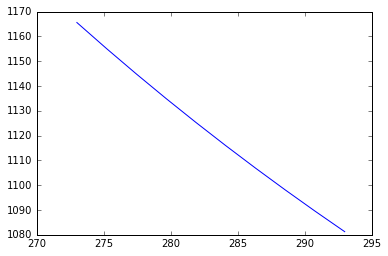

In [17]:

# get entropy given temp, e_sat; using eqn_8, 10, 11, 13

temp_list = np.linspace(273, 293, 10)

def e_sat_finder(Temp):
    e_sat = op.zeros.brentq(eqn_8,0.,10000, args=(Temp))
    return e_sat

e_sat_list = [e_sat_finder(Temp) for Temp in temp_list]

plt.plot(temp_list, e_sat_list)
plt.show()